In [4]:
%load_ext autoreload
%autoreload 2

import os

SEED = 42

head, tail = os.path.split(os.getcwd())
if tail == "notebooks": os.chdir(head)

from sca import plots, helpers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
X, y = helpers.load_data("data/raw/v1_var_desync0.h5", subset="Profiling")

Wykres outlierów (sigma > 4):

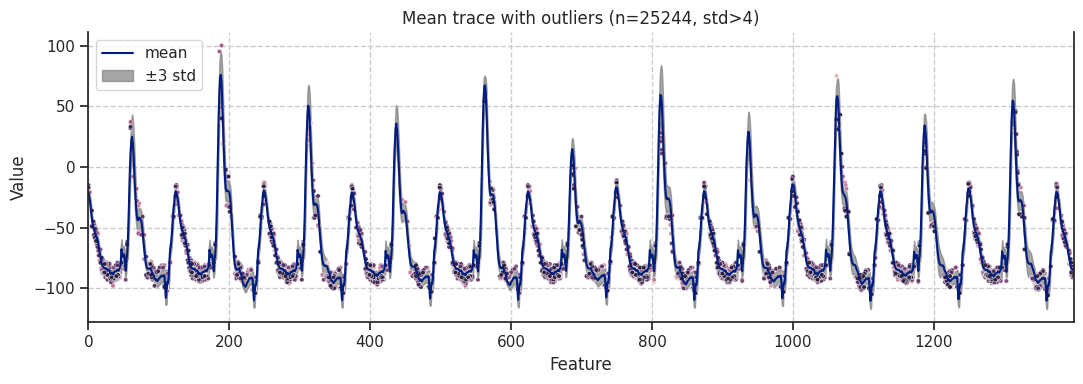

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')
sns.set_palette('dark')

def plot_trace_outliers(X):
    df, n_outliers = helpers.detect_outliers_z_score(X, std=4)
    m, sd = plots.mean_std(X)
    
    fig, ax = plt.subplots(figsize=(11, 4))
    sns.lineplot(m, ax=ax, label="mean")
    plots.std_band(ax, m, sd)
    
    sns.scatterplot(df, x="Feature", y="Value", hue="Trace", 
                    s=10, legend=False, ax=ax)
    ax.set_title(f"Mean trace with outliers (n={n_outliers}, std>4)")
    plots.lim(ax, len(m)).grid(True, linestyle='--')
    
    fig.tight_layout()
    sns.despine(ax=ax, right=False)
    ax.legend()
    return fig
    
plot_trace_outliers(X).savefig("figures/mean_trace_outliers.png", dpi=300)

Pomyślałem, że nie ma sensu narzucać dolnego progu dla odchylenia, więc po prostu posortowałem wartości według ich z-score i top-0.05% (140 tyś.) uznam za anomalie, a później zobaczę co dalej.

In [15]:
N_ANOMALIES = int(5e-4 * X.size)

df_z, _ = helpers.detect_outliers_z_score(X, std=3)
df_z.sort_values("Z-score", ascending=False, inplace=True)
df_z = df_z.iloc[:N_ANOMALIES]

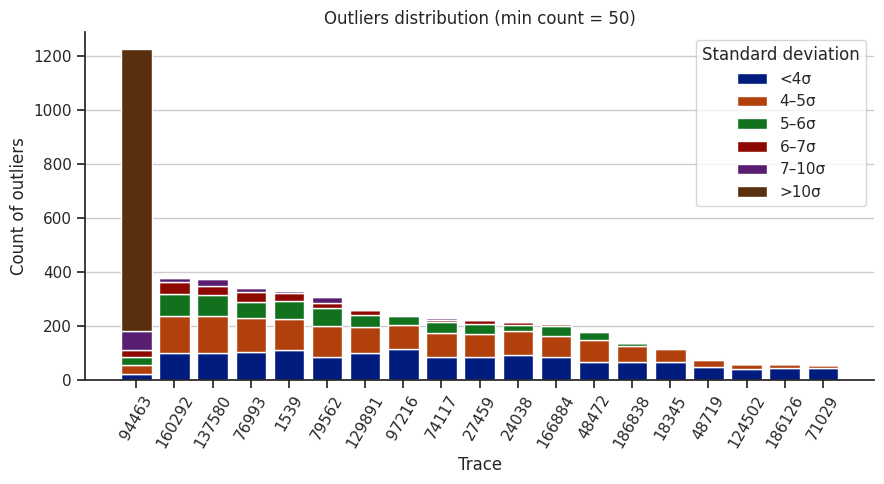

In [16]:
fig = plots.plot_feature_anomalies(df_z)
fig.savefig("figures/feature_anomalies.png", dpi=300)

Próbka 94463 jest ewidentnie błędna, więc zostanie usunięta. Pozostałe mimo długich "ogonów" wyglądają sensownie.

In [20]:
helpers.save_data(
    "data/processed/v1_var_desync0_clean01.h5",
    X.drop(index=94463),
    y.drop(index=94463),
    subset="Profiling"
)

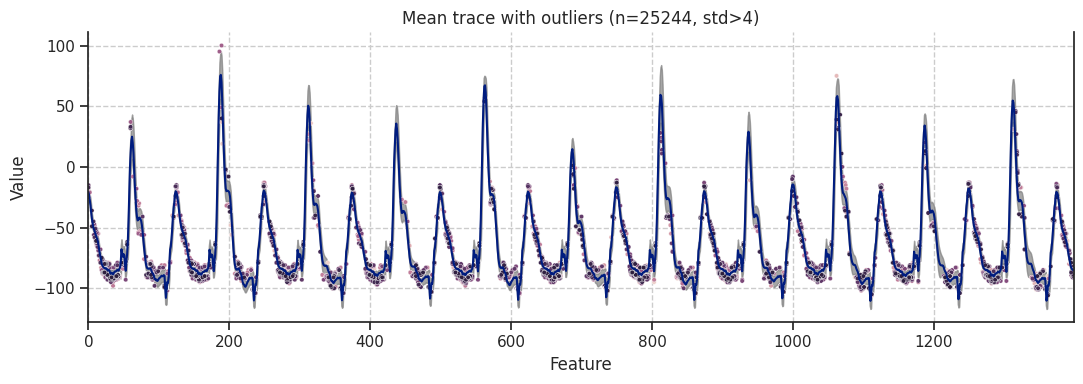

In [26]:
X, _ = helpers.load_data("data/processed/v1_var_desync0_clean01.h5", subset="Profiling")
plot_trace_outliers(X).savefig("figures/mean_trace_outliers_clean.png", dpi=300)